In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
cwd = os.getcwd()
root_directory = os.path.dirname(os.getcwd())
# check the data for NaN values or other errors
df_all = pd.read_csv(f"{root_directory}/data/all_data.csv")
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10289869 entries, 0 to 10289868
Data columns (total 27 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   area_percent    float64
 2   update_time     float64
 3   delta_time      float64
 4   plan_length     int64  
 5   replan_count    int64  
 6   logging_time    float64
 7   frame_count     int64  
 8   known_area      int64  
 9   success         bool   
 10  seed            int64  
 11  draw_sim        bool   
 12  log_plots       bool   
 13  use_threads     bool   
 14  n_bots          int64  
 15  grid_thickness  int64  
 16  screen_width    int64  
 17  screen_height   int64  
 18  min_room_size   int64  
 19  max_room_size   int64  
 20  wall_ratio      float64
 21  method          object 
 22  start_scenario  object 
 23  goal_scenario   object 
 24  experiment_ID   int64  
 25  loss_type       object 
 26  execution_date  object 
dtypes: bool(4), float64(5), int64(13), obje

In [4]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()

In [5]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Success', 'Seed', 'Draw Sim', 'Log Plots', 'Use Threads',
       'N Bots', 'Grid Thickness', 'Screen Width', 'Screen Height',
       'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type',
       'Execution Date'],
      dtype='object')

In [6]:
['Area Percent', 'Update Time', 'Wall Ratio']

['Area Percent', 'Update Time', 'Wall Ratio']

KeyboardInterrupt: 

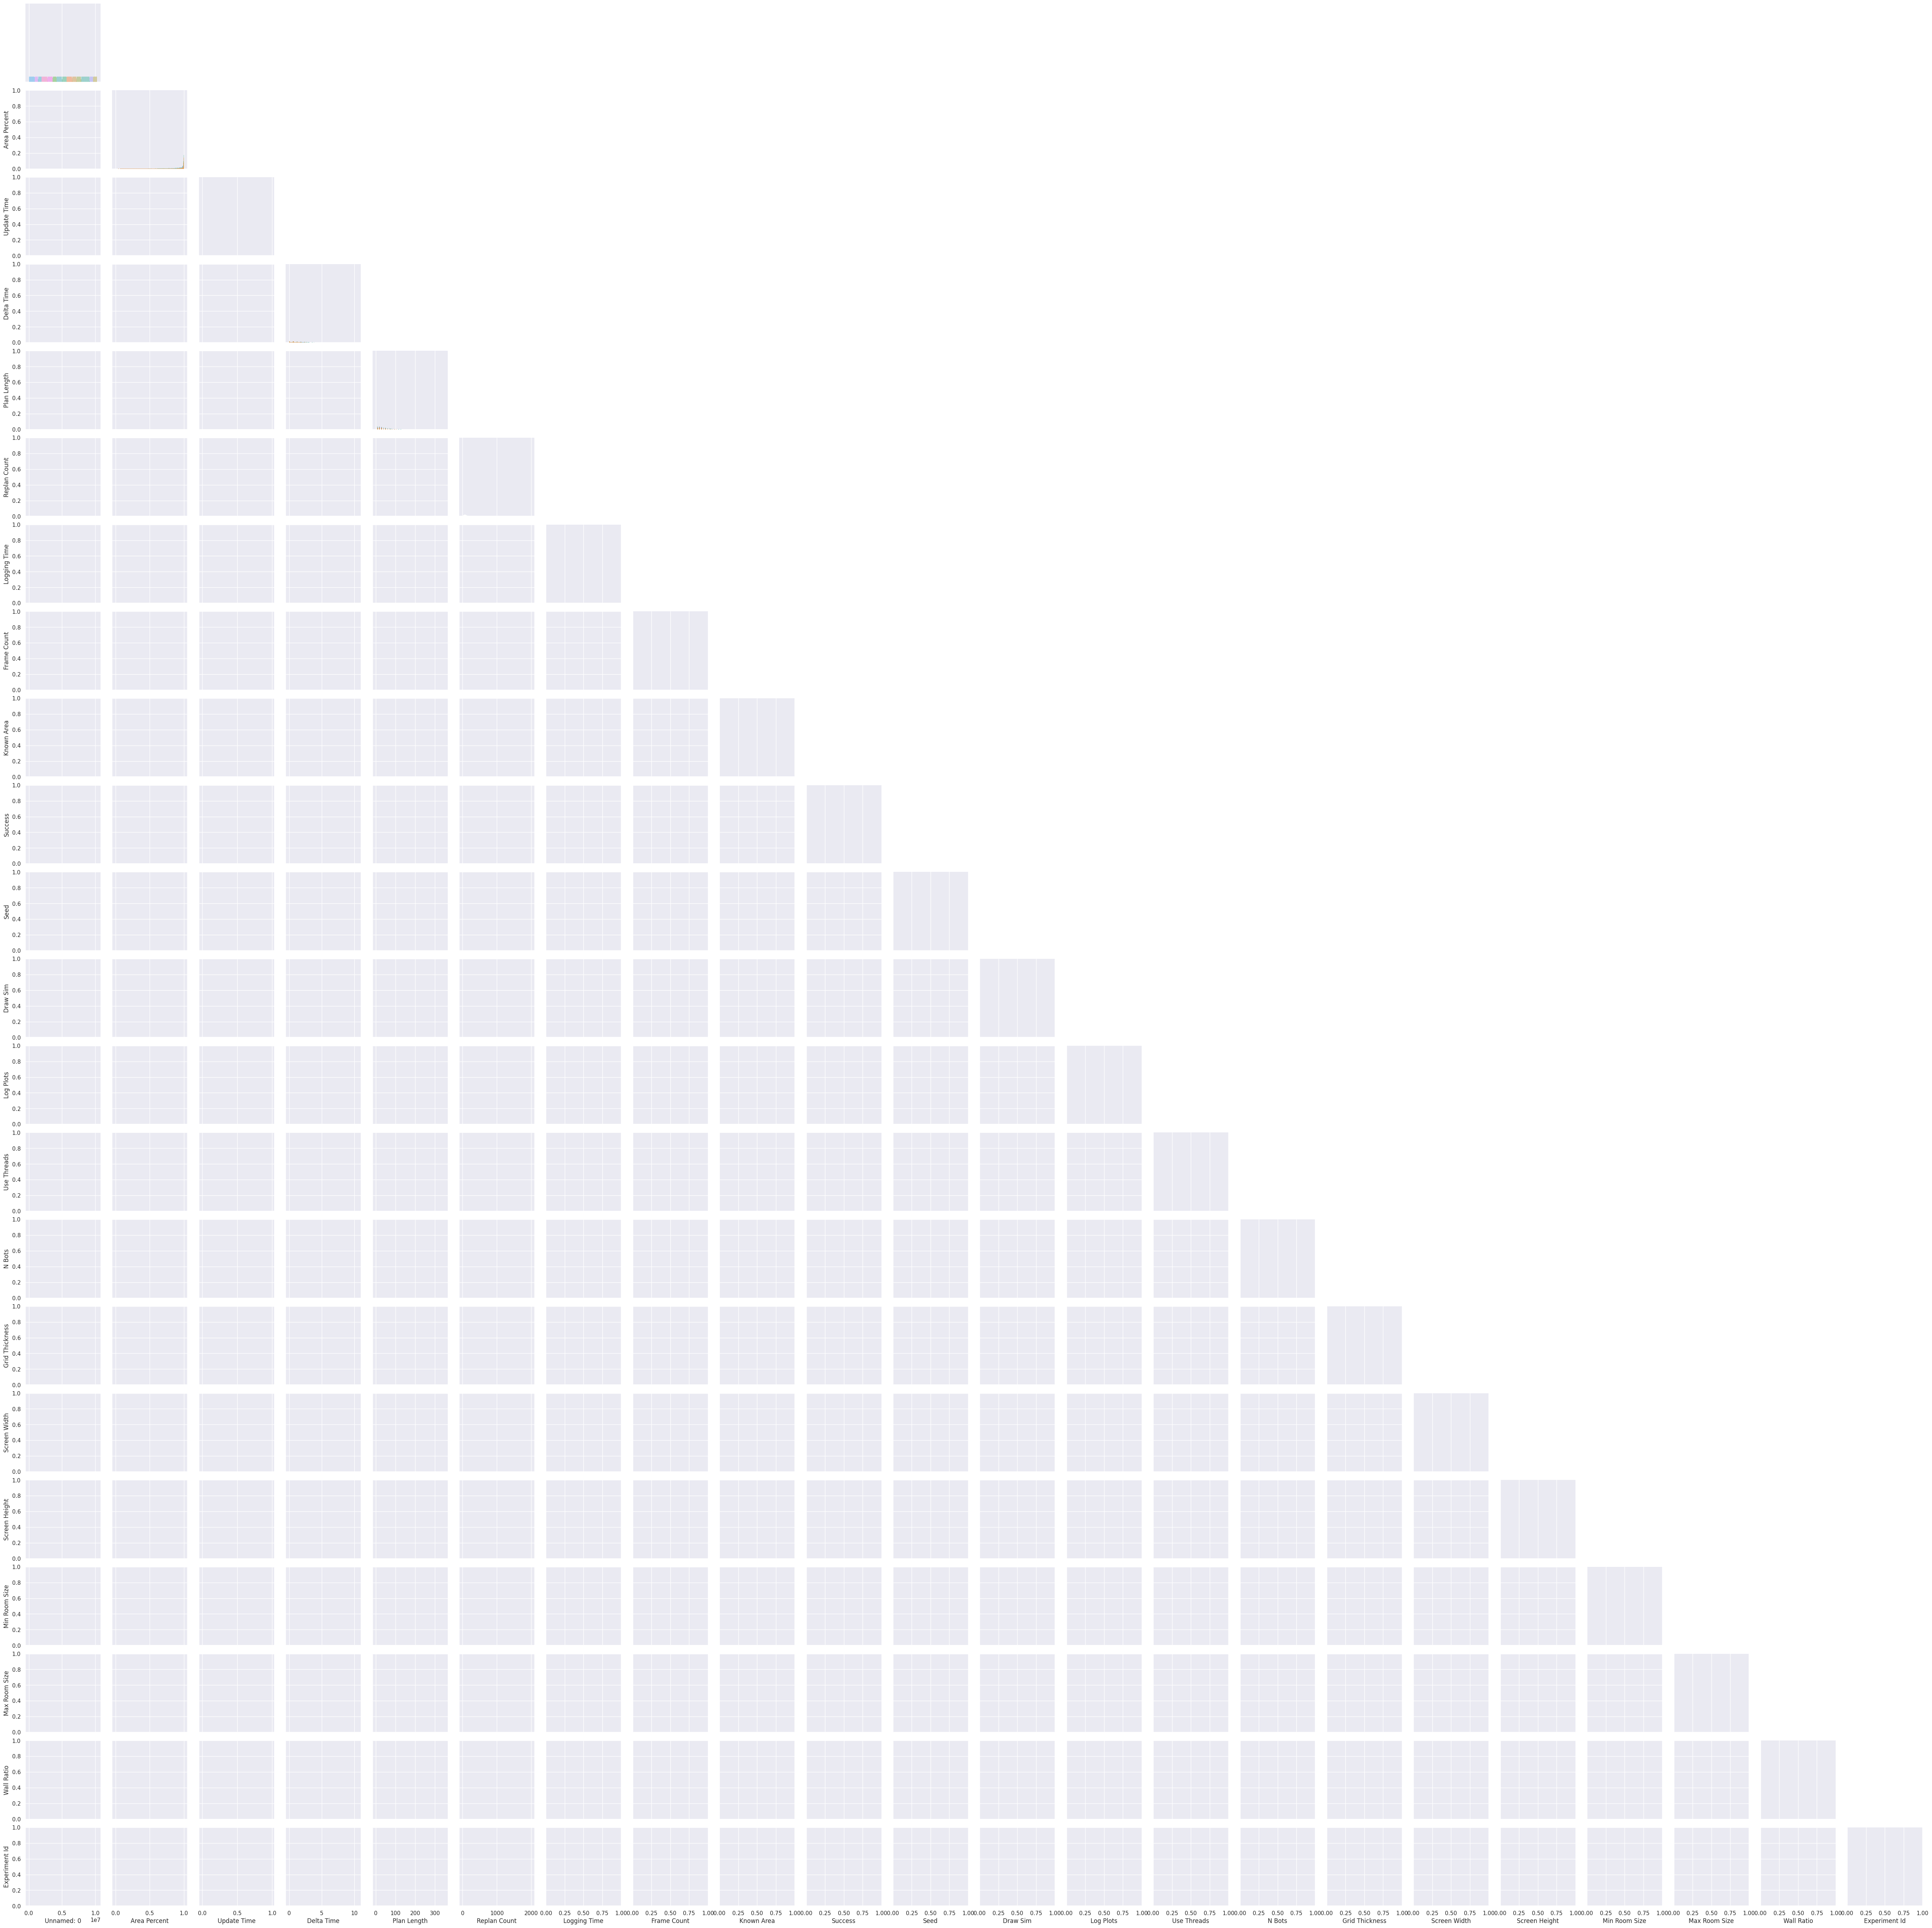

In [7]:
sns.pairplot(df_all, hue="Method", corner=True, diag_kind="hist", height=2.5)

In [ ]:
df_exp = df_all.groupby(['Experiment Id', 'Method',])['Frame Count'].max().reset_index()

df_exp

In [ ]:
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    


In [ ]:
# Create a pair grid instance
grid = sns.PairGrid(data= df_all[df_all['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred');